In [46]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#show every column
pd.set_option('display.max_columns', None)

Import the original data to gain access to links, etc.

In [47]:
data_houses = pd.read_csv("dataset_houses_with_population.csv")
data_apartments = pd.read_csv("dataset_apartments_with_population.csv")
data_sharehouses = pd.read_csv("dataset_sharehouses_with_population.csv")
data_original = pd.concat([data_houses, data_apartments, data_sharehouses])
data_original['id'] = np.arange(start = 1, stop = len(data_original) + 1, step = 1)
data_original = data_original.drop(columns="Unnamed: 0")
data_original.set_index("id", inplace=True)
data_original

,Title,Description,Link,Location,Price,Rooms,Total area,Number of floors,Condition,Readiness,Ground area,Cadastre no.,Energy mark,Lisainfo,Neighbourhood,Bedrooms,Built in year,Ownership,Notify about incorrect advertisement,Kitchen,Sanitary arrangements,Heating and ventilation,Communications and security,Data from realestate book,Register number,Additional information,This floor/Number of floors,Kulud suvel/talvel,population
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,"House for sale, Parkali 42, Paide linn, Paide,...",Total area 81.5 m²,https://www.kv.ee/muua-paide-linnas-valguskull...,"58.8837293,25.5777054",69000.0,5.0,81.5 m²,2.0,needs renovating,ready,858 m²,56601:007:1250,-,"farm building, 3*380V","water body lake near, roads in good condition ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3053.0
2,"House for sale, 3 bedrooms, Rookse, Kastre val...","Private ownership, wooden house, total area 16...",https://www.kv.ee/kinnisturebase-kinnistu-suur...,"58.240051969621,27.017403252405",240000.0,4.0,160.3 m²,1.0,all brand-new,NaN,69200 m²,NaN,NaN,"new sewerage, kitchen, open kitchen, electrici...","near forest, water body river near",3.0,2019.0,private property,Notify about incorrect advertisement,"ceramic shove, refridgerator","bath, water boiler, sauna, shower, local water",geothermic heating,"steel door, video cameras, fenced with garden",NaN,NaN,NaN,NaN,NaN,6.0
3,"House for sale, 4 bedrooms, Käänu tn, Haaberst...","Private ownership, stone house, total area 267...",https://www.kv.ee/muua-vaga-heas-seisukorras-k...,"59.4394199,24.5724249",550000.0,6.0,267.3 m²,2.0,Good condition,ready,846 m²,NaN,Missing,"balcony 9.7 m², parquet, garage, parking free ...","surrounding buildings private houses, location...",4.0,NaN,private property,Notify about incorrect advertisement,"ceramic shove, refridgerator, kitchen furniture","toilet room and bathroom separate, bath, showe...","conditioner, geothermic heating",fenced with garden,Data from realestate book,NaN,NaN,NaN,NaN,373.0
4,"House for sale, 3 bedrooms, Välja tee 6, Suuru...","Private ownership, house area 122 m², total ar...",https://www.kv.ee/hubane-maja-tallinna-lahedal...,"59.4641212,24.3978224",280000.0,4.0,122 m²,2.0,Good condition,ready,NaN,NaN,-,"public transport, box-room, TV-set, terrace, e...",NaN,3.0,2006.0,private property,Notify about incorrect advertisement,NaN,NaN,NaN,NaN,Data from realestate book,8606802.0,NaN,NaN,NaN,95.0
5,"House for sale, 1 bedrooms, Silmakese, Aakre, ...","Private ownership, log house, total area 81 m²",https://www.kv.ee/muua-audentsete-taluhooneteg...,"58.101587177111,26.187740990491",95000.0,3.0,81 m²,1.0,ready,NaN,21100 m²,NaN,NaN,"electricity, box-room, garret, frontdoor locke...",NaN,1.0,1911.0,private property,Notify about incorrect advertisement,NaN,"sauna, water boiler, bath","stove heating, õhksoojuspump, fireplace",NaN,Data from realestate book,NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,"Maisonette for sale, 3 bedrooms, Kopra tee 1, ...","Apartment ownership, wooden house, total area ...",https://www.kv.ee/muua-vaga-hea-asukohaga-skan...,"59.358238,24.807334",299500.0,4.0,123.4 m²,NaN,Good condition,NaN,1702 m²,NaN,A,"ventilation, dressing room, box-room, furnishi...",NaN,3.0,2009.0,apartment ownership,Notify about incorrect advertisement,"electric stove, kitchen furniture",urban water,"gas heating, heated floors, heated floors",neighbourhood watch,Data from realestate book,NaN,NaN,2/2,NaN,23.0
7430,"Row house box for sale, 3 bedrooms, Vägeva tee...",Total area 98.9 m²,https://www.kv.ee/muua-korgelt-hinnatud-peetri...,"59.392273,24.8166245",265000.0,4.0,98.9 m²,2.0,Good condition,ready,NaN,65301:001:1141,NaN,"balcony 8 m², TV-set, terrace, electricity, dr...","location in the center location, roads in good...",3.0,2007.0,NaN,Notify about incorrect advertisement,"induktsioon pliit, refridgerator, kitchen furn...","bath, shower, water 

Import the cleaned data.

In [48]:
data = pd.read_csv("cleaned_data.csv", index_col="id")
data.drop(columns=["population"], inplace=True)

Separate the data into X and y, and then split it into training and test datasets.

In [49]:
data = data.select_dtypes(exclude=object)

In [50]:
# Hand-pick features.
# data = data[['Price', 'Rooms', 'Total area', 'Number of floors', 'Condition', 'Readiness',
#        'Ground area', 'Energy mark', 'Built in year', 'population',
#        'Building type', 'Balcony']]

In [51]:
# Return X and y.
def separate_data(data, y_column):
    # Convert the training data to X and y.
    X_data = data.drop([y_column], axis=1)
    y_data = data[y_column]
    return X_data, y_data

X_data, y_data = separate_data(data, "Price")
X_data.columns
y_data

Index(['Rooms', 'Total area', 'Number of floors', 'Condition', 'Readiness',
       'Ground area', 'Energy mark', 'Built in year', 'Building type',
       'Balcony', 'Balcony size', 'Distance from Tallinn', 'closed courtyard',
       'terrace', 'public transport', 'packet windows', 'new sewerage', 'gas',
       'electricity', 'garage', 'local water', 'high ceilings', 'deep well',
       'cloak room', 'show case windows', 'furniture', 'fenced with garden',
       'new electricity', 'goods lift', 'ventilation', 'liquid fuel',
       'dressing room', 'furnishing possibility', 'urban water', 'kitchen',
       'farm building', 'TV-set', 'near forest', 'sewerage', 'box-room',
       'well', 'separate rooms', 'parquet',
       'organisation through the few floors', 'basement', 'separate entryway',
       'trestle', 'frontdoor locked', 'garret', 'open kitchen', 'water',
       'lift', 'underground garage', 'street entrance', '3*380V',
       'kitchen furniture', 'refridgerator', 'water boiler',

id
1        69000.0
2       240000.0
3       550000.0
4       280000.0
5        95000.0
          ...   
7429    299500.0
7430    265000.0
7431    209000.0
7432    330000.0
7433    235000.0
Name: Price, Length: 7208, dtype: float64

In [52]:
# Split the training and test data.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1111)

In [8]:
from sklearn.decomposition import PCA

# pca = PCA(0.9)
# pca.fit(X_train)
# pca.transform(X_train)
# pca.transform(X_test)

Do some cross-validation to find the best models.

In [9]:
def cross_validation(base_model, kwargs_lists, X, y, folds=5, scoring_function=None, n_jobs=12):
    # To keep track of the results.
    results = []
    
    # Just to be sure the pairs are ordered.
    keywords = []
    values = []
    for k, v in kwargs_lists.items():
        keywords.append(k)
        values.append(v)
    
    # Iterate over all the combinations.
    for idxs in product(*values):
        current_kwargs = {}
        for i in range(len(keywords)):
            current_kwargs[keywords[i]] = idxs[i]
        
        model = base_model(**current_kwargs)
        scores = cross_val_score(model, X, y, cv=folds, scoring=scoring_function, n_jobs=n_jobs)
        mean = scores.mean()
        std = scores.std()
        results.append([model, mean, std])
        print(f"Score: {round(mean, 3)}±{round(std, 3)}, model parameters: {current_kwargs}")
        
    return results

In [10]:
# Parameters to cross-validate.
# kwargs_lists = {"n_estimators": [1000], 
#        "max_depth": [20, 50, None], 
#        "max_features": [0.5]}        

# random_state=1111
# cv_results = cross_validation(RandomForestRegressor, kwargs_lists, X_train, y_train, scoring_function="r2")

In [11]:
def train_best_model(cv_results, X_train, y_train):
    sorted_scores = sorted(cv_results, key=lambda pair: pair[1], reverse=True)
    best_model = sorted_scores[0][0]
    best_model.fit(X_train, y_train)
    return best_model
    
def test_model(model, X_test, y_test):
    return model.score(X_test, y_test)

# best_model = train_best_model(cv_results, X_train, y_train)
# best_model

# test_results = test_model(best_model, X_test, y_test)
# test_results

In [53]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
rf.score(X_test, y_test)

0.6097140393523138

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
lr = LinearRegression()
lr.fit(X_train, y_train)

el = ElasticNet()
el.fit(X_train, y_train)

LinearRegression()

ElasticNet()

In [77]:
lr.score(X_test, y_test)
el.score(X_test, y_test)

0.3642203175723707

0.2908717908334246

Show some predictions.

In [55]:
predictions = rf.predict(X_test)

for i, prediction in enumerate(predictions):
    print(f"Prediction: {round(prediction)}€, actual value: {y_test.iloc[i]}€; link: {data_original.loc[X_test.iloc[i].name].Link}.")

Prediction: 208646€, actual value: 144000.0€; link: https://www.kv.ee/embach-ehitus-ou-alustas-detsembris-2021-juba-viie-3392055.html.
Prediction: 101133€, actual value: 84000.0€; link: https://www.kv.ee/muua-usna-unikaalse-vaate-ja-suure-potentsiaaliga-3384655.html.
Prediction: 89086€, actual value: 80000.0€; link: https://www.kv.ee/muua-kahetoaline-korter-mustamael-szolnoki-piirkon-3389435.html.
Prediction: 34405€, actual value: 36000.0€; link: https://www.kv.ee/uus-tanaval-umber-ringi-loodus-ja-rohelisus-koik-t-3388713.html.
Prediction: 89945€, actual value: 35000.0€; link: https://www.kv.ee/vaga-hea-asukohaga-suvekoduks-sobilik-vaiksem-elam-3374608.html.
Prediction: 165959€, actual value: 146000.0€; link: https://www.kv.ee/uusi-omanikke-otsib-hubane-3toaline-korter-tellisk-3362788.html.
Prediction: 59391€, actual value: 62000.0€; link: https://www.kv.ee/olete-otsinud-monusat-hubast-kodu-voi-head-investe-3391531.html.
Prediction: 26696€, actual value: 19500.0€; link: https://www.kv.

Show some of the worst predictions.

array([ 977,  687, 1398, ..., 1113,   84,  671], dtype=int64)

In [72]:
differences = np.abs(predictions - y_test.values)
worst_predictions = np.flip(differences.argsort())

for i in worst_predictions:
    print(f"Prediction: {round(predictions[i])}€, actual value: {y_test.iloc[i]}€; link: {data_original.loc[X_test.iloc[i].name].Link}.")

Prediction: 889737€, actual value: 3000000.0€; link: https://www.kv.ee/suur-ja-kaasaegne-uhekorruseline-maja-kakumae-mann-3390070.html.
Prediction: 1849243€, actual value: 46900.0€; link: https://www.kv.ee/saaremaa-sudames-ootab-uut-omanikku-talumaja-koos-3386263.html.
Prediction: 617318€, actual value: 2200000.0€; link: https://www.kv.ee/selles-piirkonnas-kehtib-kinnisvarainvesteeringuna-3343338.html.
Prediction: 1072495€, actual value: 2200000.0€; link: https://www.kv.ee/see-nomme-arhitektuuriline-meistriteos-on-tallinna-3370537.html.
Prediction: 617932€, actual value: 1700000.0€; link: https://www.kv.ee/see-korgelt-hinnatud-viimsi-elamurajoonis-asuv-val-3338822.html.
Prediction: 939962€, actual value: 1800000.0€; link: https://www.kv.ee/muua-arkna-ajaloline-moisakompleks-mis-asub-ca-30-3234376.html.
Prediction: 877342€, actual value: 55000.0€; link: https://www.kv.ee/rohelust-varskust-ja-puhkust-pakkuv-suure-krundiga-3371131.html.
Prediction: 391705€, actual value: 1100000.0€; link:

## Human benchmark

Not that we know how well the model predicts, let's try how well an average human can do.

In [123]:
from sklearn.metrics import r2_score
pd.options.display.max_colwidth = 180

def human_test(data_original, X_test, y_test, predictions, count=5):
    args = np.arange(len(predictions))
    np.random.shuffle(args)
    human_predictions = []
    ground_truths = []

    for i in args[:count]:
        listing = data_original.loc[X_test.iloc[i].name].copy()
        listing.drop(labels=["Price", "Data from realestate book", "Register number", "Cadastre no.", "Notify about incorrect advertisement", "Kulud suvel/talvel"], inplace=True)
        display(listing)
        human_predictions.append(float(input("Predict the price:")))
        ground_truths.append(y_test.iloc[i])
        print(f"Prediction: {round(predictions[i])}€, actual value: {y_test.iloc[i]}€; link: {data_original.loc[X_test.iloc[i].name].Link}.")

    score = r2_score(ground_truths, human_predictions)
    print(f"R2 score: {score}.")
    return score

In [124]:
human_test(data_original, X_test, y_test, predictions)

Title                                 Cottage for sale, Lalli, Kambja vald, Tartumaa - Real estate portal KV.EE 
Description                                                    Private ownership, wooden house, house area 70 m²
Link                           https://www.kv.ee/maenolval-ilusa-vaatega-porijoele-ootab-uut-pereme-1091221.html
Location                                                                                   58.2351777,26.6933794
Rooms                                                                                                        2.0
Total area                                                                                                   NaN
Number of floors                                                                                             2.0
Condition                                                                                          all brand-new
Readiness                                                                                       

Prediction: 157688€, actual value: 39990.0€; link: https://www.kv.ee/maenolval-ilusa-vaatega-porijoele-ootab-uut-pereme-1091221.html.


Title                                                   Apartment for sale, 5 rooms, Andruse põik 1, Rannamõisa, Harku vald, Harjumaa - Real estate portal KV.EE 
Description                    <strong>Lisainfo:</strong> balcony 12 m², parking free parking, box-room, separate rooms, packet windows, parquet, closed balcony 
Link                                                                            https://www.kv.ee/muua-avar-valguskullane-korter-linna-metsa-ja-mere-3153311.html
Location                                                                                                                                    59.4384533,24.5143154
Rooms                                                                                                                                                         5.0
Total area                                                                                                                                               131.4 m²
Number of floors            

Prediction: 458963€, actual value: 249900.0€; link: https://www.kv.ee/muua-avar-valguskullane-korter-linna-metsa-ja-mere-3153311.html.


Title                          Apartment for sale, 2 rooms, Kooli tn, Kehtna, Kehtna vald, Raplamaa - Real estate portal KV.EE 
Description                                                                                    Apartment ownership, stone house
Link                                          https://www.kv.ee/korterkorter-on-renoveeritud-2021-aastal-mille-kai-3388481.html
Location                                                                                                    58.926688,24.869497
Rooms                                                                                                                       2.0
Total area                                                                                                              38.6 m²
Number of floors                                                                                                            NaN
Condition                                                                                               

Prediction: 34160€, actual value: 36500.0€; link: https://www.kv.ee/korterkorter-on-renoveeritud-2021-aastal-mille-kai-3388481.html.


Title                          Apartment for sale, 2 rooms, Jõeküla tee 18/1, Haabersti, Tallinn, Harjumaa - Real estate portal KV.EE 
Description                                                                                           Apartment ownership, stone house
Link                                                 https://www.kv.ee/kakumae-sudamesse-rahulikku-ja-rohelisse-vismeistr-3381381.html
Location                                                                                                         59.4412499,24.5866672
Rooms                                                                                                                              2.0
Total area                                                                                                                     48.7 m²
Number of floors                                                                                                                   NaN
Condition                                              

Prediction: 144459€, actual value: 144000.0€; link: https://www.kv.ee/kakumae-sudamesse-rahulikku-ja-rohelisse-vismeistr-3381381.html.


Title                                                                                   Maisonette for sale, 4 bedrooms, Tammelehe tee 21, Alliku, Saue vald, Harjumaa - Real estate portal KV.EE 
Description                                                                                                               Apartment ownership, stone house, house area 131 m², total area 157.4 m²
Link                                                                                                             https://www.kv.ee/muua-suureparased-aenergiaklassi-paarismaja-boksid-3366085.html
Location                                                                                                                                                                     59.3648525,24.5954168
Rooms                                                                                                                                                                                          5.0
Total area               

Prediction: 384683€, actual value: 385000.0€; link: https://www.kv.ee/muua-suureparased-aenergiaklassi-paarismaja-boksid-3366085.html.
R2 score: 0.36643983654457657.


0.36643983654457657

Jüri's first try: -0.26216625103233193
Pretty bad...

Second try: 0.36643983654457657

## Visualizations

<Figure size 4320x2880 with 0 Axes>

[Text(2244.2750530581143, 2139.3290322580647, 'Total area <= 100.25\nsquared_error = 54828676740.921\nsamples = 3655\nvalue = 173256.444'),
 Text(1403.8997701525448, 2069.187096774194, 'Condition <= 5.5\nsquared_error = 6539470994.088\nsamples = 2376\nvalue = 113743.129'),
 Text(875.9685797696434, 1999.0451612903228, 'Longitude <= 24.926\nsquared_error = 4437530050.388\nsamples = 1678\nvalue = 86154.477'),
 Text(466.8830751198912, 1928.9032258064517, 'Latitude <= 59.354\nsquared_error = 4769313213.356\nsamples = 954\nvalue = 112677.145'),
 Text(160.5461290330064, 1858.7612903225809, 'Total area <= 48.75\nsquared_error = 1796914730.996\nsamples = 326\nvalue = 68163.526'),
 Text(70.12604043909546, 1788.6193548387098, 'Latitude <= 58.393\nsquared_error = 896834678.267\nsamples = 146\nvalue = 53137.347'),
 Text(27.711785611550848, 1718.4774193548387, 'Latitude <= 58.364\nsquared_error = 1037824275.781\nsamples = 59\nvalue = 69785.532'),
 Text(12.923882078929543, 1648.335483870968, 'Rooms <

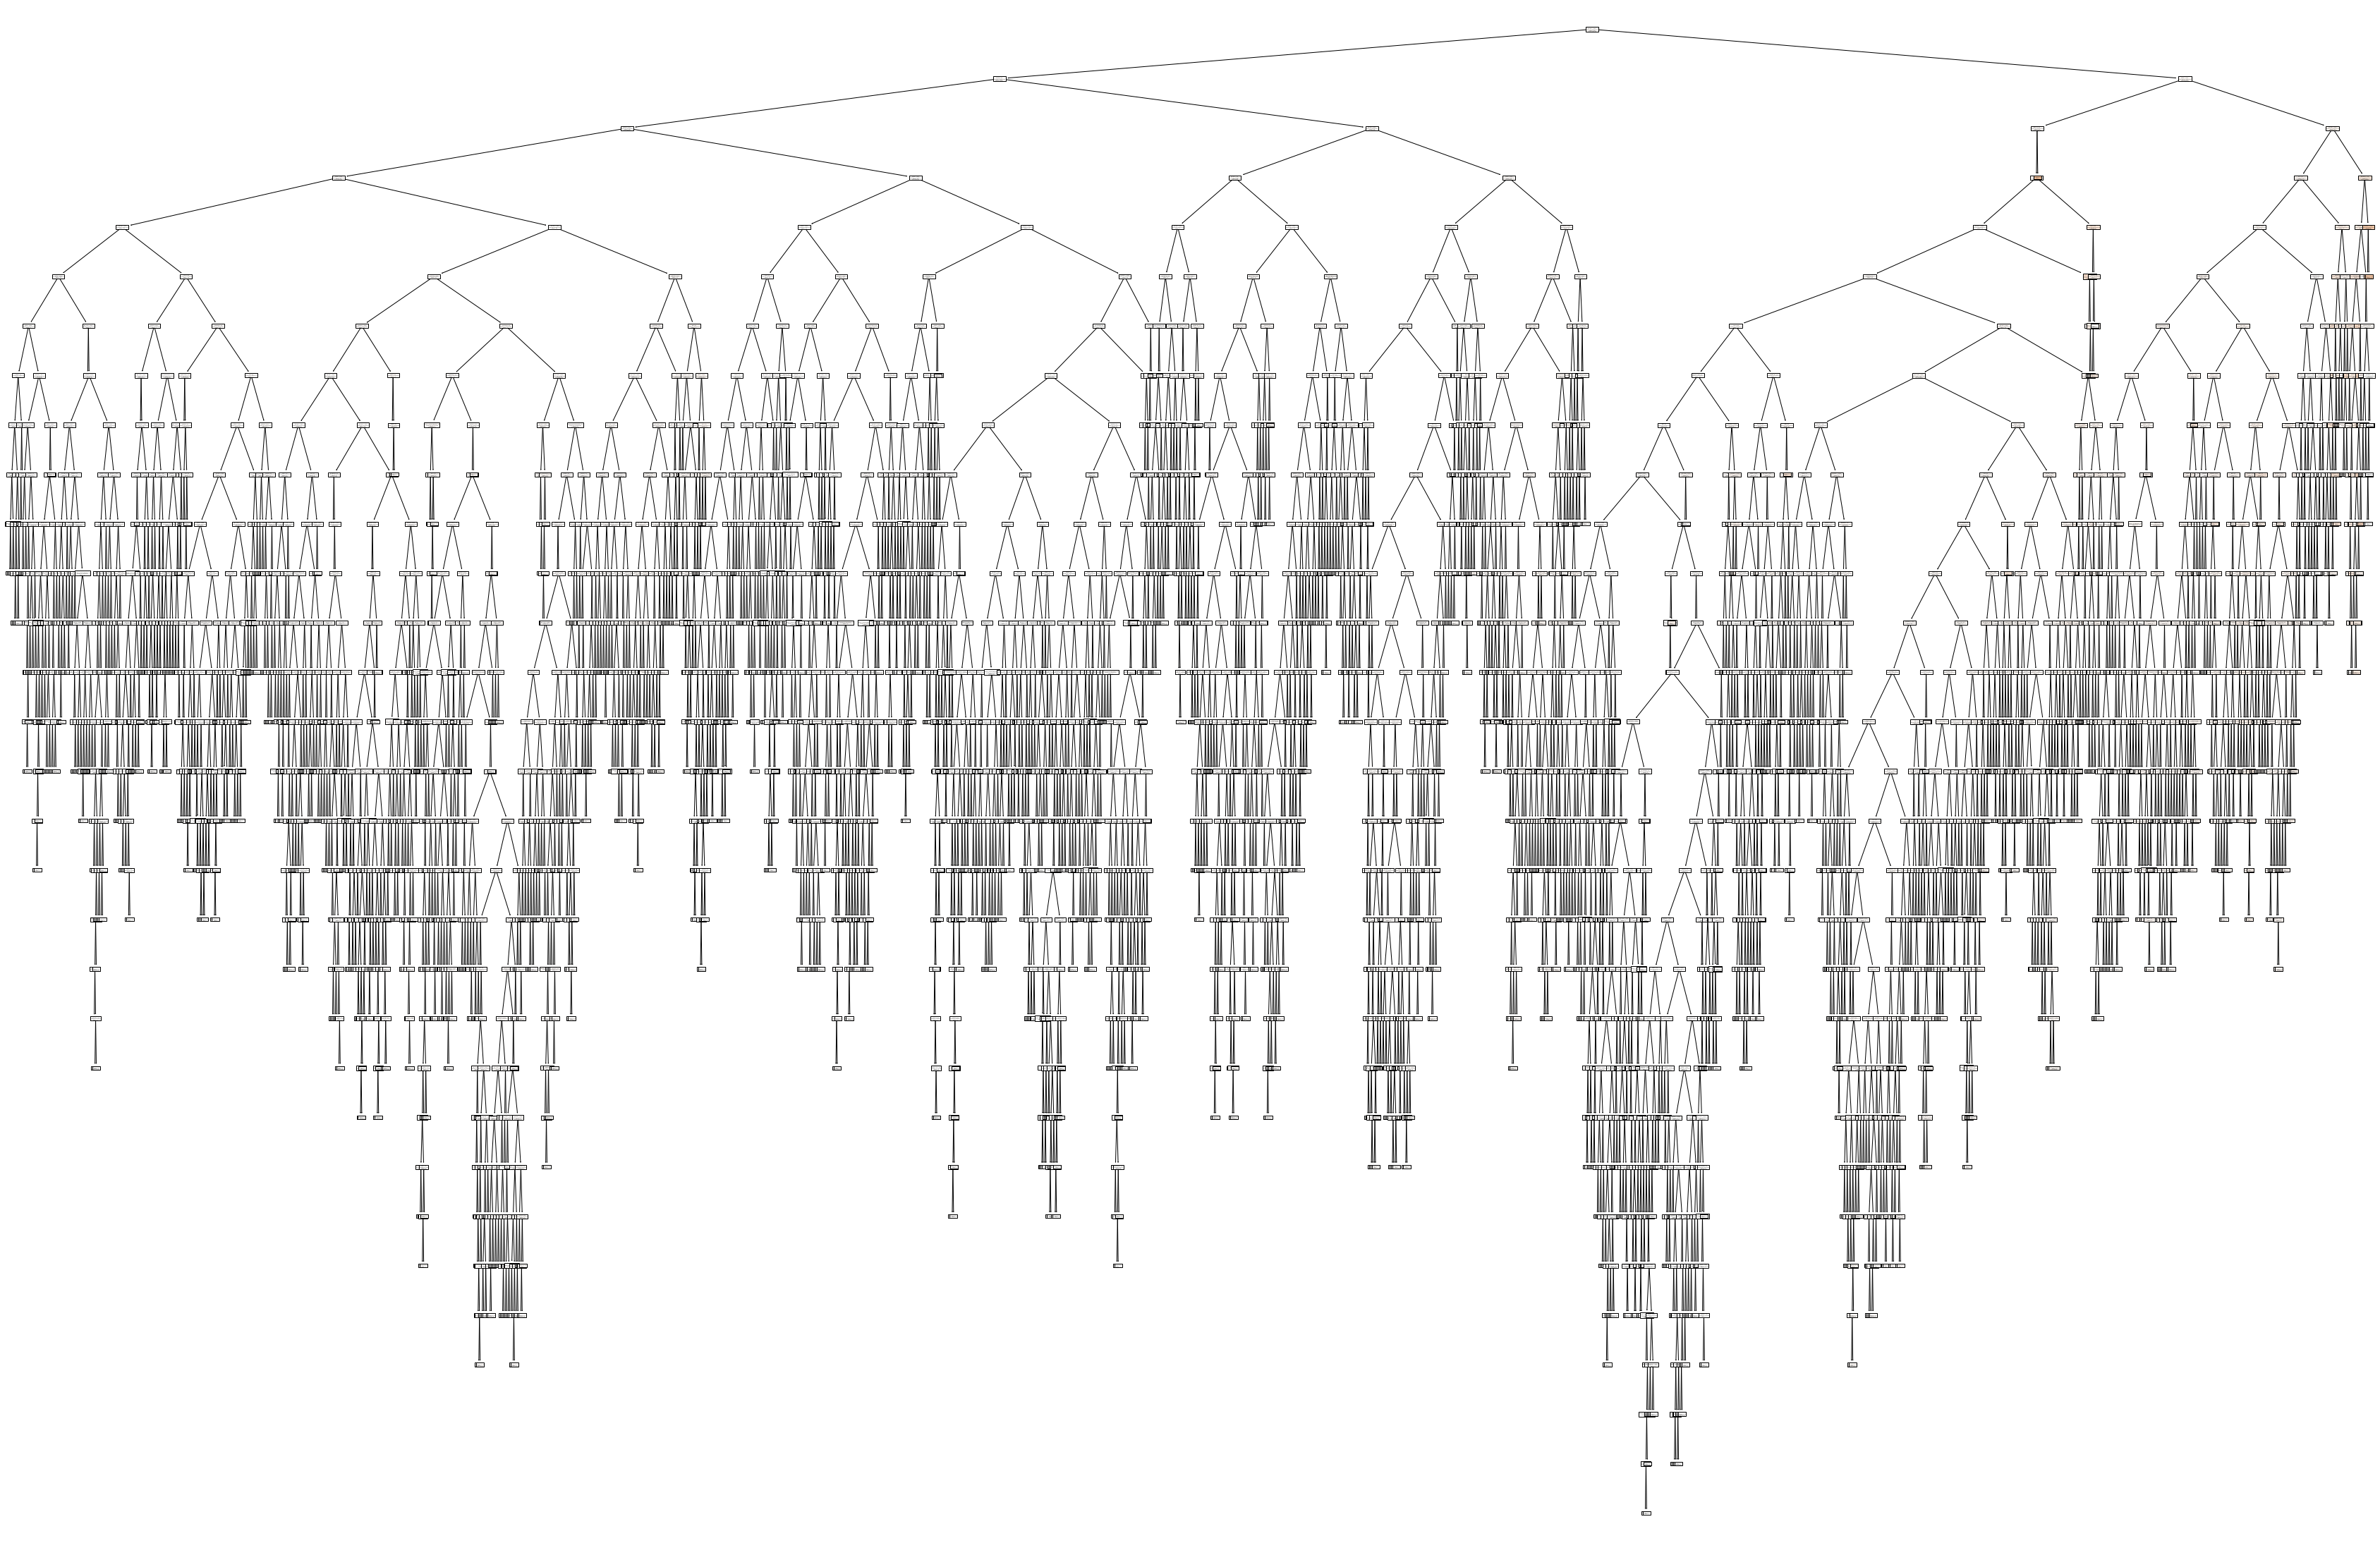

In [129]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(60,40))
plot_tree(rf.estimators_[0],feature_names=X_train.columns,filled=True)
plt.savefig("decision_tree.pdf")
plt.show()